In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import tensorflow as tf
import gym
import mujoco_py
import run_expert as exp
import Utilities_file as ut
import matplotlib.pyplot as plt

In [2]:
#warm-up exercise

expert_data = exp.returnData("experts/Hopper-v1.pkl", "Hopper-v1", None)

loading and building expert policy
obs (1, 11) (1, 11)
loaded and built
Instructions for updating:
Please use tf.global_variables instead.


[2018-03-18 14:23:48,345] From C:\Users\edoar\Desktop\ML-DODI\CS294-112-HW\hw1\tf_util.py:91: all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Please use tf.global_variables instead.


Instructions for updating:
Use `tf.variables_initializer` instead.


[2018-03-18 14:23:48,361] From C:\Users\edoar\Anaconda3\envs\mujoco-env\lib\site-packages\tensorflow\python\util\tf_should_use.py:170: initialize_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.variables_initializer` instead.
[2018-03-18 14:23:48,373] Making new env: Hopper-v1


iter 0
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 1
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 2
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 3
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 4
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 5
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 6
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 7
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 8
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 9
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 10
100/1000
200

In [3]:
observations = expert_data['observations']
actions = np.squeeze(expert_data['actions'])
epochs = 50;
batch_size = 100;
print(observations.shape)
print(actions.shape)
print(actions[0, :])

(20000, 11)
(20000, 3)
[-0.05074924  2.0774457   1.9489766 ]


In [4]:
tf.reset_default_graph()

def hopperModel(x):
    W1 = tf.get_variable("Wh1", [11, 300])
    b1 = tf.get_variable("bh1", [300])
    
    W2 = tf.get_variable("Wh2", [300, 300])
    b2 = tf.get_variable("bh2", [300])
    
    W3 = tf.get_variable("Wh3", [300, 3])
    b3 = tf.get_variable("bh3", [3])
    
    fc1 = tf.nn.relu(tf.matmul(x, W1) + b1)
    fc2 = tf.nn.relu(tf.matmul(fc1, W2) + b2)
    out = tf.matmul(fc2, W3) + b3
    
    return out

obs = tf.placeholder(dtype=tf.float32, shape=[None, 11])
act = tf.placeholder(dtype=tf.float32, shape=[None, 3])

actions_out = hopperModel(obs)
loss = tf.square(act - actions_out)
mean_loss = tf.reduce_mean(loss)

optimizer = tf.train.AdamOptimizer(1e-3)

gradient_step = optimizer.minimize(mean_loss)


sess = tf.Session()
sess.run(tf.global_variables_initializer())
losses = []
l = sess.run(mean_loss, feed_dict={obs : observations, act : actions})
print("Initial loss = " + str(l))
for i in range(epochs):
    batches = ut.getBatches(observations, actions, 100)
    for batch in batches:
        (obs_batch, act_batch) = batch
        gradient_step.run(session = sess, feed_dict={obs : obs_batch, act : act_batch})
    l = sess.run(mean_loss, feed_dict={obs : observations, act : actions})
    print("Epoch " + str(i) + ": loss = " + str(l))
    losses.append(l)
sess.close()
    

Initial loss = 2.742075
Epoch 0: loss = 0.030413825
Epoch 1: loss = 0.015632754
Epoch 2: loss = 0.010558982
Epoch 3: loss = 0.007878807
Epoch 4: loss = 0.005985079
Epoch 5: loss = 0.0051562395
Epoch 6: loss = 0.006078557
Epoch 7: loss = 0.0033302603
Epoch 8: loss = 0.0038594967
Epoch 9: loss = 0.0023935088
Epoch 10: loss = 0.002000787
Epoch 11: loss = 0.0029248993
Epoch 12: loss = 0.0033305676
Epoch 13: loss = 0.0018919113
Epoch 14: loss = 0.0019590373
Epoch 15: loss = 0.0013156652
Epoch 16: loss = 0.0011889313
Epoch 17: loss = 0.0016544345
Epoch 18: loss = 0.0013294182
Epoch 19: loss = 0.0008678134
Epoch 20: loss = 0.0016086947
Epoch 21: loss = 0.00086039724
Epoch 22: loss = 0.0013046898
Epoch 23: loss = 0.002011115
Epoch 24: loss = 0.0016409156
Epoch 25: loss = 0.0010127733
Epoch 26: loss = 0.0013607696
Epoch 27: loss = 0.0009361857
Epoch 28: loss = 0.0011573844
Epoch 29: loss = 0.0008534391
Epoch 30: loss = 0.0015579837
Epoch 31: loss = 0.00071651215
Epoch 32: loss = 0.0006939467
Ep

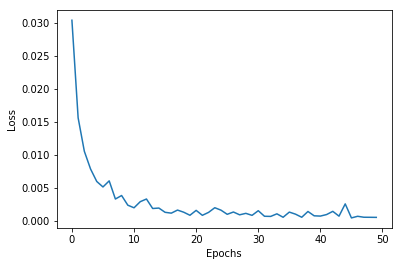

In [5]:
plt.plot(losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [36]:
#ex. 2

expert_data = exp.returnData("experts/Reacher-v1.pkl", "Reacher-v1", None, 1000)

loading and building expert policy
obs (1, 11) (1, 11)
loaded and built
Instructions for updating:
Please use tf.global_variables instead.


[2018-03-18 16:39:50,328] From C:\Users\edoar\Desktop\ML-DODI\CS294-112-HW\hw1\tf_util.py:91: all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Please use tf.global_variables instead.


Instructions for updating:
Use `tf.variables_initializer` instead.


[2018-03-18 16:39:50,335] From C:\Users\edoar\Anaconda3\envs\mujoco-env\lib\site-packages\tensorflow\python\util\tf_should_use.py:170: initialize_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.variables_initializer` instead.
[2018-03-18 16:39:50,396] Making new env: Reacher-v1


iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14
iter 15
iter 16
iter 17
iter 18
iter 19
iter 20
iter 21
iter 22
iter 23
iter 24
iter 25
iter 26
iter 27
iter 28
iter 29
iter 30
iter 31
iter 32
iter 33
iter 34
iter 35
iter 36
iter 37
iter 38
iter 39
iter 40
iter 41
iter 42
iter 43
iter 44
iter 45
iter 46
iter 47
iter 48
iter 49
iter 50
iter 51
iter 52
iter 53
iter 54
iter 55
iter 56
iter 57
iter 58
iter 59
iter 60
iter 61
iter 62
iter 63
iter 64
iter 65
iter 66
iter 67
iter 68
iter 69
iter 70
iter 71
iter 72
iter 73
iter 74
iter 75
iter 76
iter 77
iter 78
iter 79
iter 80
iter 81
iter 82
iter 83
iter 84
iter 85
iter 86
iter 87
iter 88
iter 89
iter 90
iter 91
iter 92
iter 93
iter 94
iter 95
iter 96
iter 97
iter 98
iter 99
iter 100
iter 101
iter 102
iter 103
iter 104
iter 105
iter 106
iter 107
iter 108
iter 109
iter 110
iter 111
iter 112
iter 113
iter 114
iter 115
iter 116
iter 117
iter 118
iter 119
iter 120
iter 121
iter 122
ite

iter 923
iter 924
iter 925
iter 926
iter 927
iter 928
iter 929
iter 930
iter 931
iter 932
iter 933
iter 934
iter 935
iter 936
iter 937
iter 938
iter 939
iter 940
iter 941
iter 942
iter 943
iter 944
iter 945
iter 946
iter 947
iter 948
iter 949
iter 950
iter 951
iter 952
iter 953
iter 954
iter 955
iter 956
iter 957
iter 958
iter 959
iter 960
iter 961
iter 962
iter 963
iter 964
iter 965
iter 966
iter 967
iter 968
iter 969
iter 970
iter 971
iter 972
iter 973
iter 974
iter 975
iter 976
iter 977
iter 978
iter 979
iter 980
iter 981
iter 982
iter 983
iter 984
iter 985
iter 986
iter 987
iter 988
iter 989
iter 990
iter 991
iter 992
iter 993
iter 994
iter 995
iter 996
iter 997
iter 998
iter 999
returns [-2.6822996152319543, -3.463647864221513, -2.896060654741648, -3.2171386906445356, -2.3969830832780974, -7.82628750161475, -3.142030636262674, -2.778453604508579, -3.674210756543251, -1.7586338682000355, -3.967926966294108, -4.917624219868936, -4.533187686350663, -4.668769998438693, -7.415692920022

In [37]:
observations = expert_data['observations']
actions = np.squeeze(expert_data['actions'])
epochs = 20;
batch_size = 100;
print(observations.shape)
print(actions.shape)
print(actions[0, :])

(50000, 11)
(50000, 2)
[0.29296324 0.28927705]


In [38]:
tf.reset_default_graph()

def reacherModel(x):
    W1 = tf.get_variable("Wh1", [11, 500])
    b1 = tf.get_variable("bh1", [500])
    
    W2 = tf.get_variable("Wh2", [500, 500])
    b2 = tf.get_variable("bh2", [500])
    
    W3 = tf.get_variable("Wh3", [500, 500])
    b3 = tf.get_variable("bh3", [500])
    
    W4 = tf.get_variable("Wh4", [500, 2])
    b4 = tf.get_variable("bh4", [2])
    
    fc1 = tf.nn.relu(tf.matmul(x, W1) + b1)
    fc2 = tf.nn.relu(tf.matmul(fc1, W2) + b2)
    fc3 = tf.nn.relu(tf.matmul(fc2, W3) + b3)
    out = tf.matmul(fc3, W4) + b4
    
    return out

obs = tf.placeholder(dtype=tf.float32, shape=[None, 11])
act = tf.placeholder(dtype=tf.float32, shape=[None, 2])

actions_out = reacherModel(obs)
loss = tf.square(act - actions_out)
mean_loss = tf.reduce_mean(loss)

optimizer = tf.train.AdamOptimizer(1e-3)

gradient_step = optimizer.minimize(mean_loss)


sess = tf.Session()
sess.run(tf.global_variables_initializer())
losses = []
l = sess.run(mean_loss, feed_dict={obs : observations, act : actions})
print("Initial loss = " + str(l))
for i in range(epochs):
    batches = ut.getBatches(observations, actions, 100)
    for batch in batches:
        (obs_batch, act_batch) = batch
        gradient_step.run(session = sess, feed_dict={obs : obs_batch, act : act_batch})
    l = sess.run(mean_loss, feed_dict={obs : observations, act : actions})
    print("Epoch " + str(i) + ": loss = " + str(l))
    losses.append(l)


Initial loss = 0.678456
Epoch 0: loss = 0.00044329144
Epoch 1: loss = 0.00030733307
Epoch 2: loss = 0.00015273238
Epoch 3: loss = 0.00019458821
Epoch 4: loss = 7.3960975e-05
Epoch 5: loss = 6.3049185e-05
Epoch 6: loss = 5.7090165e-05
Epoch 7: loss = 7.4955045e-05
Epoch 8: loss = 6.667732e-05
Epoch 9: loss = 6.228003e-05
Epoch 10: loss = 6.881293e-05
Epoch 11: loss = 5.3561147e-05
Epoch 12: loss = 6.623122e-05
Epoch 13: loss = 3.7317575e-05
Epoch 14: loss = 4.438226e-05
Epoch 15: loss = 2.2604809e-05
Epoch 16: loss = 2.6194835e-05
Epoch 17: loss = 3.7764243e-05
Epoch 18: loss = 6.3678344e-05
Epoch 19: loss = 3.1502463e-05


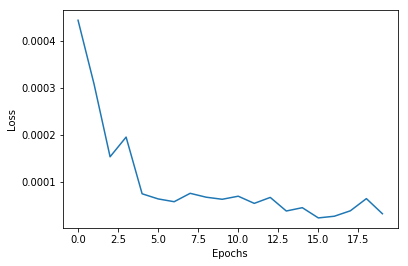

In [39]:
plt.plot(losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [40]:
test_runs = 20
env = gym.make('Reacher-v1')
max_steps = env.spec.timestep_limit
returns_t = []
observations_t = []
actions_t = []
for i in range(test_runs):
    print('iter', i)
    obser = env.reset()
    done = False
    totalr = 0.
    steps = 0
    while not done:
        action = sess.run(actions_out, feed_dict={obs : obser[None,:]})
        observations_t.append(obser)
        actions_t.append(action)
        obser, r, done, _ = env.step(action)
        totalr += r
        steps += 1
        if steps % 100 == 0: print("%i/%i"%(steps, max_steps))
        if steps >= max_steps:
            break
    returns_t.append(totalr)

print('returns', returns_t)
print('mean return', np.mean(returns_t))
print('std of return', np.std(returns_t))

[2018-03-18 16:41:20,307] Making new env: Reacher-v1


iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14
iter 15
iter 16
iter 17
iter 18
iter 19
returns [-4.473477755728941, -5.85534154366816, -4.589868439486757, -5.438672715807558, -4.062577120892546, -5.384112417281058, -5.640556853011044, -6.702679645868197, -2.8786392879976255, -5.62450900817309, -4.8178422983539795, -2.146836421355038, -3.554870201364006, -0.8595105919451773, -4.346436619822495, -5.521248636294311, -1.2195823855702612, -3.2869809314167595, -5.658322739600267, -3.367301051539486]
mean return -4.271468333258838
std of return 1.5557945657830627


In [23]:
sess.close()

In [22]:
expert_data = exp.returnData("experts/Humanoid-v1.pkl", "Humanoid-v1", None, 50)

loading and building expert policy
obs (1, 376) (1, 376)
loaded and built
Instructions for updating:
Please use tf.global_variables instead.


[2018-03-19 18:05:00,790] From C:\Users\edoar\Desktop\ML-DODI\CS294-112-HW\hw1\tf_util.py:91: all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Please use tf.global_variables instead.


Instructions for updating:
Use `tf.variables_initializer` instead.


[2018-03-19 18:05:00,799] From C:\Users\edoar\Anaconda3\envs\mujoco-env\lib\site-packages\tensorflow\python\util\tf_should_use.py:170: initialize_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.variables_initializer` instead.
[2018-03-19 18:05:00,896] Making new env: Humanoid-v1


iter 0
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 1
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 2
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 3
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 4
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 5
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 6
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 7
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 8
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 9
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 10
100/1000
200

In [24]:
observations = expert_data['observations']
actions = np.squeeze(expert_data['actions'])
epochs = 20;
batch_size = 100;
print(observations.shape)
print(actions.shape)
print(actions[0, :])

(50000, 376)
(50000, 17)
[ 2.0140135   0.10339192 -0.3607575  -0.31427816 -0.02543497  2.7935903
  0.21666652 -0.26663077  0.18903583  2.4354432   1.0676913   0.53327125
 -1.9889247   0.5491925  -0.7328088  -0.14099799  0.5628545 ]


In [25]:
tf.reset_default_graph()

def humanoidModel(x):
    W1 = tf.get_variable("Wh1", [376, 500])
    b1 = tf.get_variable("bh1", [500])
    
    W2 = tf.get_variable("Wh2", [500, 500])
    b2 = tf.get_variable("bh2", [500])
    
    W3 = tf.get_variable("Wh3", [500, 150])
    b3 = tf.get_variable("bh3", [150])
    
    W4 = tf.get_variable("Wh4", [150, 17])
    b4 = tf.get_variable("bh4", [17])
    
    fc1 = tf.nn.relu(tf.matmul(x, W1) + b1)
    fc2 = tf.nn.relu(tf.matmul(fc1, W2) + b2)
    fc3 = tf.nn.relu(tf.matmul(fc2, W3) + b3)
    out = tf.matmul(fc3, W4) + b4
    
    return out

obs = tf.placeholder(dtype=tf.float32, shape=[None, 376])
act = tf.placeholder(dtype=tf.float32, shape=[None, 17])

actions_out = humanoidModel(obs)
loss = tf.square(act - actions_out)
mean_loss = tf.reduce_mean(loss)

optimizer = tf.train.AdamOptimizer(1e-3)

gradient_step = optimizer.minimize(mean_loss)


sess = tf.Session()
sess.run(tf.global_variables_initializer())
losses = []
l = sess.run(mean_loss, feed_dict={obs : observations, act : actions})
print("Initial loss = " + str(l))
for i in range(epochs):
    batches = ut.getBatches(observations, actions, 100)
    for batch in batches:
        (obs_batch, act_batch) = batch
        gradient_step.run(session = sess, feed_dict={obs : obs_batch, act : act_batch})
    l = sess.run(mean_loss, feed_dict={obs : observations, act : actions})
    print("Epoch " + str(i) + ": loss = " + str(l))
    losses.append(l)

Initial loss = 467.68283
Epoch 0: loss = 0.36641574
Epoch 1: loss = 0.3703857
Epoch 2: loss = 0.515218
Epoch 3: loss = 0.1537197
Epoch 4: loss = 0.12677604
Epoch 5: loss = 0.14560348
Epoch 6: loss = 0.12151043
Epoch 7: loss = 0.11519568
Epoch 8: loss = 0.10248043
Epoch 9: loss = 0.11886111
Epoch 10: loss = 0.07799416
Epoch 11: loss = 0.09873145
Epoch 12: loss = 0.069984175
Epoch 13: loss = 0.06307651
Epoch 14: loss = 0.061546806
Epoch 15: loss = 0.052550018
Epoch 16: loss = 0.057193317
Epoch 17: loss = 0.05344636
Epoch 18: loss = 0.052729394
Epoch 19: loss = 0.046108544


In [26]:
#DAGGER Algorithm

dagger_iterations = 5
test_runs = 50
epochs = 5
env = gym.make('Humanoid-v1')
max_steps = env.spec.timestep_limit
all_mean_returns = []
all_mean_std = []
for i in range(dagger_iterations):
    print('Dagger iteration : dagger iteration number ' + str(i))
    returns_t = []
    observations_t = []
    actions_t = []
    for i in range(test_runs):
        print('iter', i)
        obser = env.reset()
        done = False
        totalr = 0.
        steps = 0
        while not done:
            action = sess.run(actions_out, feed_dict={obs : obser[None,:]})
            observations_t.append(obser)
            actions_t.append(action)
            obser, r, done, _ = env.step(action)
            totalr += r
            steps += 1
            if steps % 100 == 0: print("%i/%i"%(steps, max_steps))
            if steps >= max_steps:
                break
        returns_t.append(totalr)
    all_mean_returns.append(np.mean(returns_t))
    all_mean_std.append(np.std(returns_t))
    print('mean return', np.mean(returns_t))
    print('std of return', np.std(returns_t))
    correct_actions = exp.runData("experts/Humanoid-v1.pkl", np.array(observations_t))
    observations = np.concatenate((observations, np.array(observations_t)), axis = 0)
    actions = np.concatenate((actions,np.array(correct_actions)), axis=0)
    print("Total sample number " + str(observations.shape))
    print(actions.shape)

    losses = []
    l = sess.run(mean_loss, feed_dict={obs : observations, act : actions})
    print("Initial loss = " + str(l))
    for i in range(epochs):
        batches = ut.getBatches(observations, actions, 100)
        for batch in batches:
            (obs_batch, act_batch) = batch
            gradient_step.run(session = sess, feed_dict={obs : obs_batch, act : act_batch})
        l = sess.run(mean_loss, feed_dict={obs : observations, act : actions})
        print("Epoch " + str(i) + ": loss = " + str(l))
        losses.append(l)

[2018-03-19 18:07:23,175] Making new env: Humanoid-v1


Dagger iteration : dagger iteration number 0
iter 0
iter 1
100/1000
iter 2
100/1000
iter 3
iter 4
100/1000
iter 5
100/1000
200/1000
300/1000
iter 6
100/1000
iter 7
100/1000
200/1000
iter 8
100/1000
iter 9
iter 10
100/1000
200/1000
iter 11
100/1000
iter 12
iter 13
100/1000
iter 14
100/1000
iter 15
iter 16
iter 17
100/1000
iter 18
100/1000
iter 19
iter 20
100/1000
iter 21
iter 22
100/1000
iter 23
100/1000
iter 24
iter 25
100/1000
iter 26
iter 27
100/1000
iter 28
iter 29
100/1000
iter 30
iter 31
100/1000
iter 32
100/1000
iter 33
iter 34
100/1000
iter 35
iter 36
100/1000
iter 37
iter 38
100/1000
iter 39
100/1000
iter 40
100/1000
iter 41
iter 42
iter 43
100/1000
iter 44
iter 45
iter 46
100/1000
iter 47
100/1000
iter 48
100/1000
iter 49
mean return 782.9670503390735
std of return 397.62910708970844
loading and printing expert policy
obs (1, 376) (1, 376)
loaded and built
Instructions for updating:
Please use tf.global_variables instead.


[2018-03-19 18:07:27,878] From C:\Users\edoar\Desktop\ML-DODI\CS294-112-HW\hw1\tf_util.py:91: all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Please use tf.global_variables instead.


Instructions for updating:
Use `tf.variables_initializer` instead.


[2018-03-19 18:07:27,886] From C:\Users\edoar\Anaconda3\envs\mujoco-env\lib\site-packages\tensorflow\python\util\tf_should_use.py:170: initialize_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.variables_initializer` instead.


Total sample number (55987, 376)
(55987, 17)
Initial loss = 0.117273375
Epoch 0: loss = 0.08630364
Epoch 1: loss = 0.07862073
Epoch 2: loss = 0.06456894
Epoch 3: loss = 0.0590957
Epoch 4: loss = 0.057805028
Dagger iteration : dagger iteration number 1
iter 0
100/1000
iter 1
100/1000
iter 2
100/1000
iter 3
100/1000
200/1000
iter 4
100/1000
200/1000
iter 5
100/1000
iter 6
100/1000
iter 7
iter 8
100/1000
iter 9
100/1000
iter 10
100/1000
iter 11
100/1000
200/1000
iter 12
100/1000
iter 13
100/1000
iter 14
100/1000
iter 15
iter 16
100/1000
200/1000
iter 17
100/1000
200/1000
iter 18
iter 19
iter 20
100/1000
iter 21
100/1000
iter 22
100/1000
iter 23
100/1000
iter 24
iter 25
iter 26
100/1000
iter 27
100/1000
iter 28
100/1000
iter 29
iter 30
100/1000
iter 31
100/1000
iter 32
100/1000
iter 33
iter 34
100/1000
200/1000
iter 35
100/1000
200/1000
iter 36
100/1000
200/1000
300/1000
iter 37
100/1000
iter 38
iter 39
100/1000
iter 40
100/1000
200/1000
iter 41
100/1000
iter 42
100/1000
iter 43
100/1000
i

[2018-03-19 18:07:51,314] From C:\Users\edoar\Desktop\ML-DODI\CS294-112-HW\hw1\tf_util.py:91: all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Please use tf.global_variables instead.


Instructions for updating:
Use `tf.variables_initializer` instead.


[2018-03-19 18:07:51,321] From C:\Users\edoar\Anaconda3\envs\mujoco-env\lib\site-packages\tensorflow\python\util\tf_should_use.py:170: initialize_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.variables_initializer` instead.


Total sample number (63464, 376)
(63464, 17)
Initial loss = 0.08198506
Epoch 0: loss = 0.07021893
Epoch 1: loss = 0.06078033
Epoch 2: loss = 0.059137892
Epoch 3: loss = 0.056246687
Epoch 4: loss = 0.053562254
Dagger iteration : dagger iteration number 2
iter 0
100/1000
iter 1
100/1000
200/1000
300/1000
400/1000
iter 2
100/1000
iter 3
100/1000
iter 4
100/1000
iter 5
100/1000
iter 6
100/1000
iter 7
100/1000
200/1000
iter 8
100/1000
200/1000
300/1000
iter 9
100/1000
200/1000
300/1000
400/1000
iter 10
100/1000
iter 11
100/1000
200/1000
iter 12
100/1000
200/1000
iter 13
100/1000
iter 14
100/1000
200/1000
iter 15
100/1000
200/1000
300/1000
iter 16
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
iter 17
100/1000
200/1000
iter 18
100/1000
200/1000
300/1000
400/1000
500/1000
iter 19
100/1000
200/1000
iter 20
100/1000
iter 21
100/1000
200/1000
300/1000
400/1000
iter 22
100/1000
200/1000
300/1000
iter 23
100/1000
iter 24
100/1000
200/1000
300/1000
iter 25
100/1000
200/1000
iter 26
100/1000


[2018-03-19 18:08:24,364] From C:\Users\edoar\Desktop\ML-DODI\CS294-112-HW\hw1\tf_util.py:91: all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Please use tf.global_variables instead.


Instructions for updating:
Use `tf.variables_initializer` instead.


[2018-03-19 18:08:24,371] From C:\Users\edoar\Anaconda3\envs\mujoco-env\lib\site-packages\tensorflow\python\util\tf_should_use.py:170: initialize_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.variables_initializer` instead.


Total sample number (81229, 376)
(81229, 17)
Initial loss = 0.07111979
Epoch 0: loss = 0.06537096
Epoch 1: loss = 0.054803282
Epoch 2: loss = 0.052613456
Epoch 3: loss = 0.04732088
Epoch 4: loss = 0.047872655
Dagger iteration : dagger iteration number 3
iter 0
100/1000
200/1000
300/1000
400/1000
iter 1
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 2
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 3
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 4
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 5
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 6
100/1000
iter 7
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 8
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
i

[2018-03-19 18:09:23,467] From C:\Users\edoar\Desktop\ML-DODI\CS294-112-HW\hw1\tf_util.py:91: all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Please use tf.global_variables instead.


Instructions for updating:
Use `tf.variables_initializer` instead.


[2018-03-19 18:09:23,475] From C:\Users\edoar\Anaconda3\envs\mujoco-env\lib\site-packages\tensorflow\python\util\tf_should_use.py:170: initialize_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.variables_initializer` instead.


Total sample number (126006, 376)
(126006, 17)
Initial loss = 0.051404297
Epoch 0: loss = 0.042233992
Epoch 1: loss = 0.043540295
Epoch 2: loss = 0.041053846
Epoch 3: loss = 0.03892645
Epoch 4: loss = 0.035056405
Dagger iteration : dagger iteration number 4
iter 0
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 1
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 2
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 3
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 4
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 5
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 6
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 7
100/1000
200/1000
300/1000
400/1000
500/1000
600/

[2018-03-19 18:10:40,731] From C:\Users\edoar\Desktop\ML-DODI\CS294-112-HW\hw1\tf_util.py:91: all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Please use tf.global_variables instead.


Instructions for updating:
Use `tf.variables_initializer` instead.


[2018-03-19 18:10:40,739] From C:\Users\edoar\Anaconda3\envs\mujoco-env\lib\site-packages\tensorflow\python\util\tf_should_use.py:170: initialize_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.variables_initializer` instead.


Total sample number (175079, 376)
(175079, 17)
Initial loss = 0.035368226
Epoch 0: loss = 0.035671264
Epoch 1: loss = 0.03208559
Epoch 2: loss = 0.029833373
Epoch 3: loss = 0.030491626
Epoch 4: loss = 0.032186285


In [27]:
#Final run and results

returns_t = []
observations_t = []
actions_t = []
for i in range(test_runs):
    print('iter', i)
    obser = env.reset()
    done = False
    totalr = 0.
    steps = 0
    while not done:
        action = sess.run(actions_out, feed_dict={obs : obser[None,:]})
        observations_t.append(obser)
        actions_t.append(action)
        obser, r, done, _ = env.step(action)
        totalr += r
        steps += 1
        if steps % 100 == 0: print("%i/%i"%(steps, max_steps))
        if steps >= max_steps:
            break
    returns_t.append(totalr)
all_mean_returns.append(np.mean(returns_t))
all_mean_std.append(np.std(returns_t))
print('mean return', np.mean(returns_t))
print('std of return', np.std(returns_t))

iter 0
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 1
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 2
100/1000
200/1000
300/1000
iter 3
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 4
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 5
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 6
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 7
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 8
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 9
100/1000
200/1000
300/1000
iter 10
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
1000/1000
iter 11
100/1000
200/1000
300/1000
400/1000
500/1

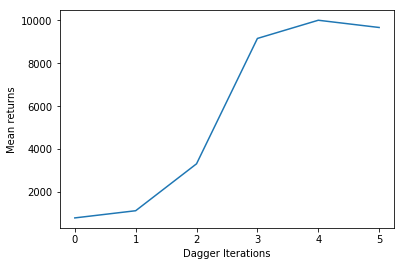

In [28]:
plt.plot(all_mean_returns)
plt.ylabel('Mean returns')
plt.xlabel('Dagger Iterations')
plt.show()

In [30]:
#Function for displaying outputs in jupyter source/author: https://gist.github.com/andrewschreiber/e9a21bba9c604a790e605fbacd3f4109

def show_state(env, step=0):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("%s. Step: %d" % (env._spec.id,step))
    
    plt.pause(0.001)  # pause for plots to update

    if is_ipython:
        display.clear_output(wait=True)
        display.display(plt.gcf())

In [1]:
sess.close()

NameError: name 'sess' is not defined